# Загрузка библиотек

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict 
from collections import Counter

import docx
import csv

import nltk 
from nltk.corpus import stopwords
nltk.download('punkt')

from wordcloud import WordCloud
from PIL import Image

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NeKonn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Загрузка и предобработка данных

In [2]:
# Загружаем данные
folder_csv = './data/data_IN/Rick_and_Morty.csv'
rick_and_morty_data = pd.read_csv(folder_csv)
rick_and_morty_data

,name,line
0,Rick,"Morty, you got to come on. You got to come wi..."
1,Morty,"Rick, what’s going on?"
2,Rick,"I got a surprise for you, Morty."
3,Morty,It’s the middle of the night. What are you ta...
4,Rick,I got a surprise for you.
...,...,...
2473,Testicle Monster A,"There he is, there he is, there he is, there ..."
2474,Testicle Monster B,"So that’s the guy, huh?"
2475,Testicle Monster A,"Yeah, that’s him. Hey, man, remember me? [him..."
2476,Albert Einstein,I vill mess vith time!


Я хочу сделать бота в стиле Рика, поэтому оставлю только его реплики для дальнейшей работы

In [3]:
# Фильтруем реплики Рика
rick_lines = rick_and_morty_data[rick_and_morty_data['name'] == 'Rick']['line'].tolist()
rick_lines

[' Morty, you got to come on. You got to come with me.',
 ' I got a surprise for you, Morty.',
 ' I got a surprise for you.',
 ' I got a surprise for you, Morty.',
 ' What do you think of this flying vehicle, Morty? I built it out of stuff I found in the garage.',
 ' Morty, I had to I had to I had to I had to make a bomb, Morty. I had to create a bomb.',
 ' We’re gonna drop it down there just get a whole fresh start, Morty. Create a whole fresh start.',
 ' Come on, Morty. Just take it easy, Morty. It’s gonna be good. Right now, we’re gonna go pick up your little friend Jessica.',
 ' When I drop the bomb you know, I want you to have somebody, you know I want you to have the thing I’m gonna make it like a new Adam and Eve, and you’re gonna be Adam.',
 ' And Jessica’s gonna be Eve,…',
 ' And so that’s the surprise, Morty.',
 ' I-I get what you’re trying to say, Morty. Listen, I’m not you don’t you don’t got to worry about me trying to fool around with with Jessica or mess around with Jess

Я хочу, чтобы мой бот Рик был русскоязычным, поэтому, для того чтобы сократить время на перевод я воспользовался нейронной сетью DeepL Translate, и сохранил результат в docx формат, поэтому теперь заного подгружаем данные, но уже на русском языке!

In [4]:
# Чтение содержимого .docx файла
def read_docx(file_path):
    doc = docx.Document(file_path)
    data = []
    for para in doc.paragraphs:
        # Разделение параграфа на части, если необходимо, можно использовать другие разделители
        row_data = para.text.split(';')  # Предположим, что данные в параграфе разделены символом ';'
        data.append(row_data)
    return data

# Запись данных в .csv файл
def write_csv(data, csv_file_path):
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerows(data)

# Использование функций
docx_file_path = './data/data_OUT/Rick.docx'  # Замените на путь к вашему .docx файлу
csv_file_path = './data/data_OUT/Rick.csv'  # Путь, по которому будет сохранен .csv файл

# Чтение и конвертация
docx_data = read_docx(docx_file_path)
write_csv(docx_data, csv_file_path)

In [5]:
# загружаем данные на русском языке
rick = pd.read_csv('./data/data_OUT/Rick.csv', sep=';', encoding='utf-8')
rick.head()

,Unnamed: 0
0,"Морти, ты должен пойти со мной. Ты должен пойт..."
1,"У меня для тебя сюрприз, Морти"","
2,"У меня есть для тебя сюрприз"","
3,"У меня для тебя сюрприз, Морти"","
4,Что ты думаешь об этом летающем средстве пере...


Для установления характера Рика, нужно выяснить, какими словами он пользуется чаще всего, а также обратить внимание на манеру его речи и ведение диалога!

Чтобы это сделать сначала предобработаем реплики Рика!

In [6]:
rick.isnull().sum()

Unnamed: 0    1
dtype: int64

In [7]:
# Загружаем список стоп-слов
nltk.download('stopwords')
russian_stop_words = set(stopwords.words('russian'))

# Функция предобработки одной строки
def preprocess_line(line):
    # Проверка на None или NaN и возврат пустой строки в таком случае
    if line is None or pd.isna(line):
        return ''
    
    # Удаление слов в скобках
    line = re.sub(r'\[.*?\]|\(.*?\)', '', line)
    # Приведение к нижнему регистру
    line = line.lower()
    # Удаление всего, кроме букв русского алфавита
    line = re.sub(r'[^а-я\s]', '', line)
    # Удаление стоп-слов
    line = ' '.join([word for word in line.split() if word not in russian_stop_words])
    return line

# Применение функции к столбцу 'Unnamed: 0' в датафрейме rick
rick['preprocessed_text'] = rick['Unnamed: 0'].apply(preprocess_line)

# Проверка результатов
rick.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NeKonn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,preprocessed_text
0,"Морти, ты должен пойти со мной. Ты должен пойт...",морти должен пойти мной должен пойти мной
1,"У меня для тебя сюрприз, Морти"",",сюрприз морти
2,"У меня есть для тебя сюрприз"",",сюрприз
3,"У меня для тебя сюрприз, Морти"",",сюрприз морти
4,Что ты думаешь об этом летающем средстве пере...,думаешь летающем средстве передвижения морти п...


In [8]:
# Объединяем все предобработанные строки из столбца 'preprocessed_text' в один большой список слов
words = [word for line in rick['preprocessed_text'].tolist() for word in line.split()]

# Используем Counter для подсчета частоты каждого слова в списке
word_counts = Counter(words)
word_counts

Counter({'морти': 321,
         'это': 201,
         'просто': 41,
         'джерри': 36,
         'знаешь': 26,
         'тебе': 26,
         'очень': 24,
         'эй': 22,
         'должен': 21,
         'давай': 21,
         'ладно': 20,
         'времени': 18,
         'действительно': 16,
         'нужно': 16,
         'знаю': 15,
         'саммер': 15,
         'слушай': 14,
         'время': 14,
         'почему': 13,
         'похоже': 13,
         'парень': 12,
         'можешь': 12,
         'должны': 12,
         'немного': 12,
         'нам': 12,
         'боже': 12,
         'привет': 11,
         'могу': 11,
         'сделать': 10,
         'хочу': 10,
         'хороший': 10,
         'возьми': 10,
         'знаете': 10,
         'прямо': 9,
         'вокруг': 9,
         'люди': 9,
         'семена': 9,
         'черт': 9,
         'нравится': 9,
         'твоя': 8,
         'пойдем': 8,
         'делать': 8,
         'ребята': 8,
         'можем': 8,
         'пока': 8

Наведем красивости и посмотрим на облако часто используемых слов от Рика

Сначала я сгенерировал маску 'rick.jpg' в Midjourney v.6, использовав промпт "Black silohuette of rick from rick and morty, white background". 

Теперь Предобработаем эту маску, сделав ее прозрачной:

In [9]:
# Загрузка изображения
mask_image_path = './pictures/rick.jpg'
original_image = Image.open(mask_image_path)

# Преобразование в RGBA (если изображение уже не в этом формате)
if original_image.mode != 'RGBA':
    rgba_image = original_image.convert('RGBA')
else:
    rgba_image = original_image.copy()

# Получаем данные всех пикселей
datas = rgba_image.getdata()

# Создаем новые данные для пикселей, делая белые (или очень светлые) пиксели прозрачными
new_data = []
for item in datas:
    # Пиксель прозрачный, если он белый или очень светлый
    if item[0] > 220 and item[1] > 220 and item[2] > 220:
        new_data.append((255, 255, 255, 0))  # Полностью прозрачный
    else:
        new_data.append(item)  # Иначе сохраняем пиксель без изменений

rgba_image.putdata(new_data)
transparent_mask_path = './pictures/rick_transparent_mask.png'
rgba_image.save(transparent_mask_path, "PNG")

transparent_mask_path

'./pictures/rick_transparent_mask.png'

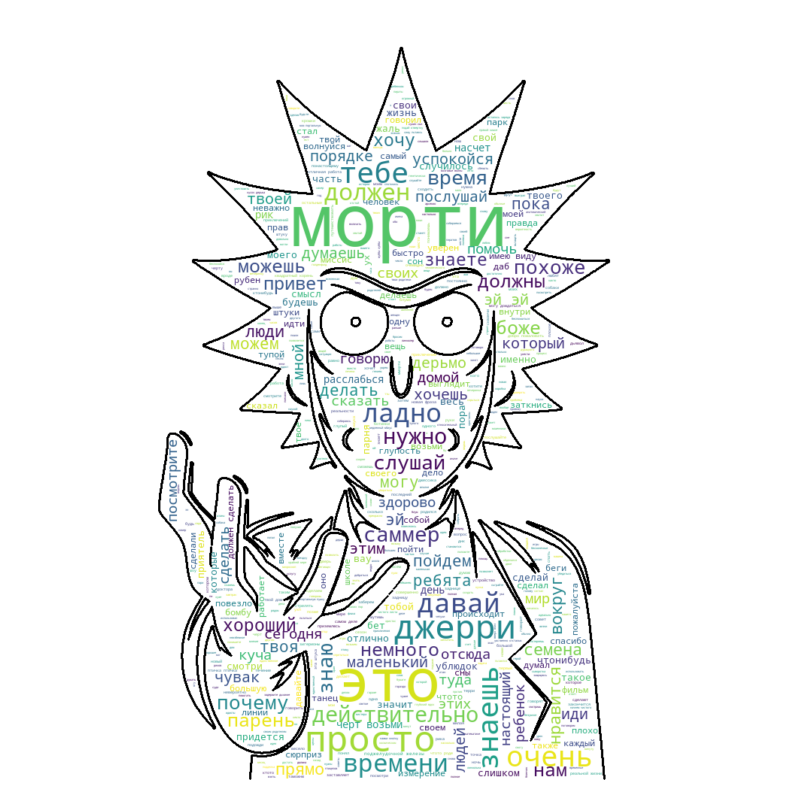

In [11]:
# Загружаем изображение, которое будет использоваться как маска
mask_image_path = './pictures/rick_transparent_mask.png'
mask_image = np.array(Image.open(mask_image_path))

text_for_wordcloud = ' '.join(rick['preprocessed_text'].dropna())

# Создаем объект WordCloud
wc = WordCloud(
    background_color='white', 
    max_words=2000, 
    mask=mask_image,
    contour_width=3, 
    contour_color='black'
)

# Генерируем облако слов
wc.generate(text_for_wordcloud)

# Отображаем облако слов
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') 
plt.show()

wc.to_file("pictures/rick_wordcloud.png")